# Visualization of dataset

In [1]:
import numpy as np
import os

## Visualization function

In [16]:
## Visualization

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def display_point_cloud_box_ax_test(ax, pts):
    
    # display axis arrow
    O = (0, 0, 0)
    X = (1, 0, 0)
    Y = (0, 1, 0)
    Z = (0, 0, 1)
    ax.quiver(O,O,O,X,Y,Z,length=np.max(pts),arrow_length_ratio=0.3, color='r')
    
    # display point cloud
    ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=5, alpha = 1.0)
    
    # display center point
    cp = np.mean(pts, axis = 0)
    ax.scatter(cp[0], cp[1], cp[2], c='r', s=1)
    
    # display bounding box   
    cube_definition_array = [
        np.array(list(item))
        for item in find_cube_definition(pts)
    ]
    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    faces = Poly3DCollection(edges, linewidths=0.1, edgecolors='k')
    faces.set_facecolor((0,0,1,0.05))
    
    ax.add_collection3d(faces)
    
    # Edges of the cube
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    # make axis equal
    p_min = np.min(points, axis=0)
    p_max = np.max(points, axis=0)
    max_range = np.array([p_max[0]-p_min[0], p_max[1]-p_min[1], p_max[2]-p_min[2]]).max() / 2.0

    mid_x = (p_max[0]+p_min[0]) * 0.5
    mid_y = (p_max[1]+p_min[1]) * 0.5
    mid_z = (p_max[2]+p_min[2]) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    return ax


def find_cube_definition(pts):
    p_min = np.min(pts, axis = 0)
    p_max = np.max(pts, axis = 0)
    return [ (p_min[0],p_min[1],p_min[2]), 
            (p_max[0],p_min[1],p_min[2]), 
            (p_min[0],p_max[1],p_min[2]), 
            (p_min[0],p_min[1],p_max[2])]
def resample_point_cloud(pts, resample_ratio):
    step = int(1./resample_ratio)
    idx = range(0, len(pts), step)
    return pts[idx]

## Visualization of dataset (aligned surface points)


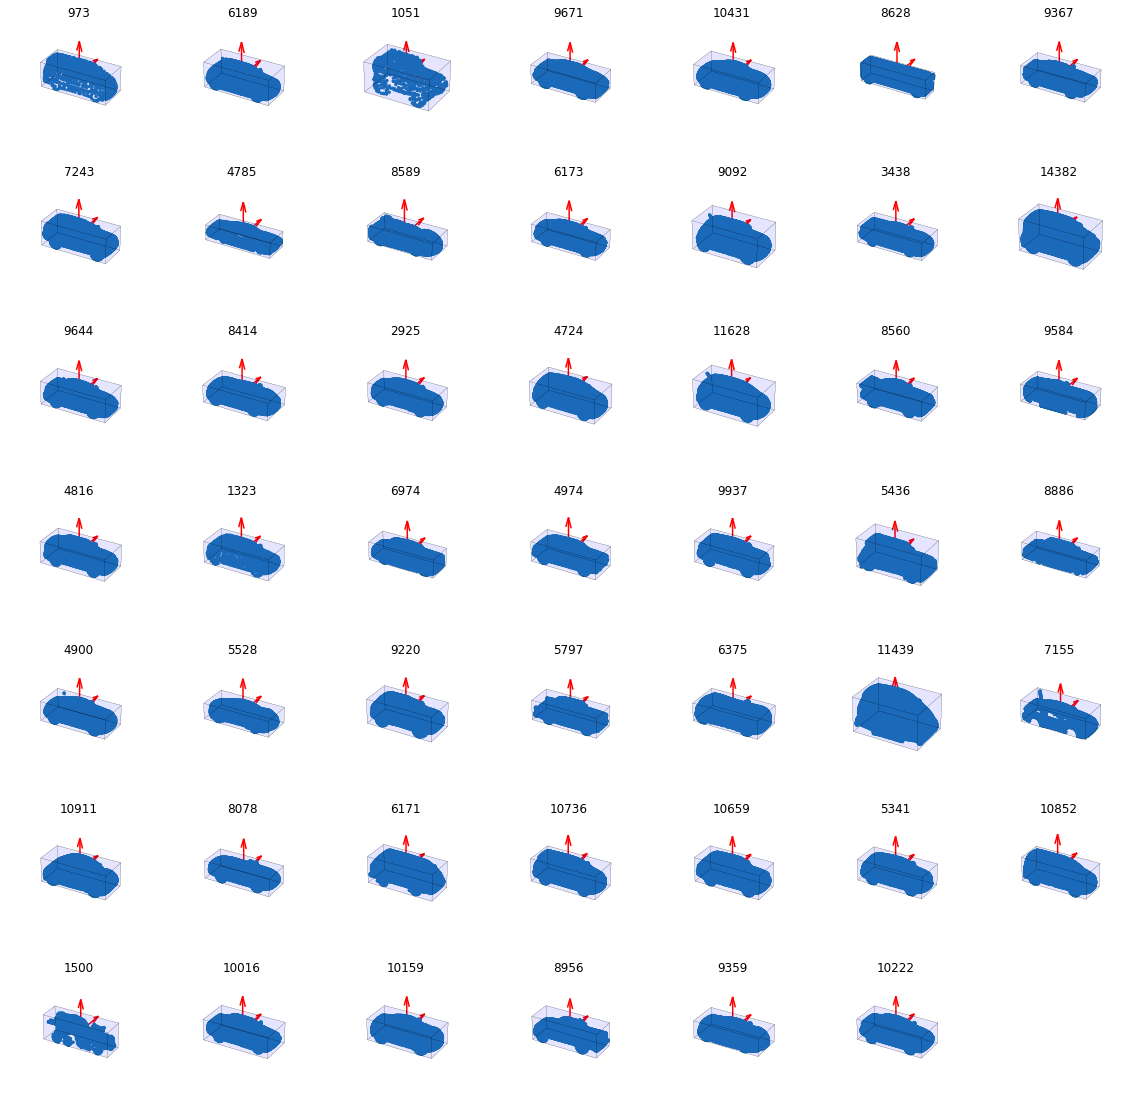

In [17]:
""" Car """

root_path = os.path.abspath('./dataset/stl_dataset/car_np_point_align_align_surface_points')

## find ".npy" files
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

## load numpy point cloud
pcs = []
for i in range ( len ( fname ) ):
    
    pcs.append(np.load(fname[i]))
    

%matplotlib inline
fig = plt.figure(figsize = (20,20))

for i in range( len(pcs) ):

    ax = fig.add_subplot(7,7,i+1, projection='3d')
    ax.set_title("{}".format(len(pcs[i])))
    display_point_cloud_box_ax_test(ax, pcs[i])
    
    plt.axis('off')

plt.show()
    

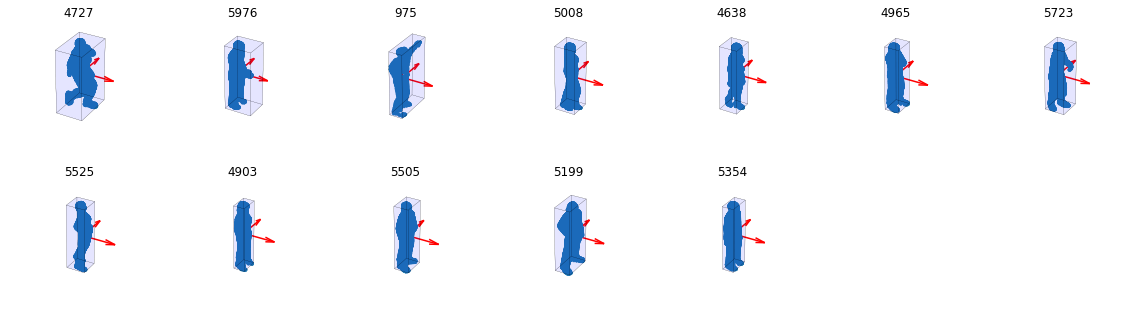

In [18]:
""" Car """

root_path = os.path.abspath('./dataset/stl_dataset/pedestrian_np_point_align_align_surface_points')

## find ".npy" files
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

## load numpy point cloud
pcs = []
for i in range ( len ( fname ) ):
    
    pcs.append(np.load(fname[i]))
    

%matplotlib inline
fig = plt.figure(figsize = (20,20))

for i in range( len(pcs) ):

    ax = fig.add_subplot(7,7,i+1, projection='3d')
    ax.set_title("{}".format(len(pcs[i])))
    display_point_cloud_box_ax_test(ax, pcs[i])
    
    plt.axis('off')

plt.show()